In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Übungsaufgaben 6

## Cross-Validation
für den Advertising-Datensatz

In [2]:
advertising = pd.read_csv('advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
Market,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
from sklearn.model_selection import train_test_split

X = advertising[['TV']]
y = advertising['sales']

Best polynomial degree: 5 with MSE: 10.606382237772028


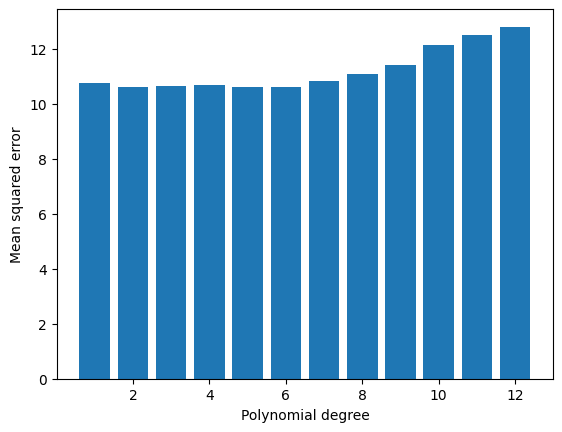

In [4]:
# cross validation on mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# for different polynomial degrees
degrees = np.arange(1, 13)
neg_mse = np.array([])

for degree in degrees:
    # create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    neg_mse = np.append(neg_mse, np.mean(cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error')))

plt.bar(degrees, np.negative(neg_mse))
plt.xlabel('Polynomial degree')
plt.ylabel('Mean squared error')
print(f"Best polynomial degree: {degrees[np.argmax(neg_mse)]} with MSE: {-np.max(neg_mse)}")

## Hochdimensionale Daten
- 500 Input-Variablen und eine Output-Variable, n=100
- zufällig generierte Daten

In [5]:
# random np array
np.random.seed(42)
X = np.random.rand(100, 500)
y = np.random.rand(100)
X.shape, y.shape

((100, 500), (100,))

In [6]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)

print('Train mse: ', mean_squared_error(y_train, reg.predict(X_train)))
print('Test mse: ', mean_squared_error(y_test, reg.predict(X_test)))

Train mse:  2.2394713393334778e-31
Test mse:  0.1154667115661707


Wieso ist der mse quasi 0?